In [27]:
from   faraway.datasets import teengamb, uswages
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

### 1

In [2]:
tg = teengamb.load()
tg.head()

,sex,status,income,verbal,gamble
0,1,51,2.0,8,0.0
1,1,28,2.5,8,0.0
2,1,37,2.0,6,0.0
3,1,28,7.0,4,7.3
4,1,65,2.0,8,19.6


In [3]:
lmod = smf.ols('gamble ~ sex + status + income + verbal', data=tg).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gamble   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     11.69
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.81e-06
Time:                        08:48:58   Log-Likelihood:                -210.78
No. Observations:                  47   AIC:                             431.6
Df Residuals:                      42   BIC:                             440.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5557     17.197      1.312      0.197     -12.149      57.260
sex          -22.1183      8.211     -2.694      0.010     -38.689      -5.548
status         0.0522      0.281      0.186      0.853      -0.515       0.620
income         4.9620      1.025      4.839      0.000       2.893       7.031
verbal        -2.9595      2.172     -1.362      0.180      -7.343       1.424
==============================================================================
Omnibus:                       31.143   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.046
Skew:                           1.604   Prob(JB):                     1.14e-22
Kurtosis:                       9.427   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
lmod.resid.idxmax()

23

In [5]:
lmod.resid.mean(), lmod.resid.median()

(6.743352920974312e-13, -1.4513920689688593)

In [6]:
lmod.fittedvalues.corr(lmod.resid)

1.1390689371420674e-15

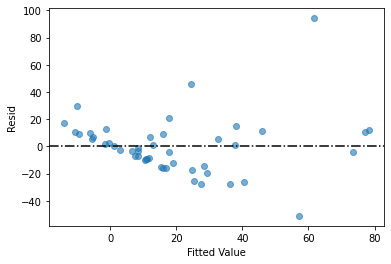

In [7]:
plt.scatter(lmod.fittedvalues, lmod.resid, alpha=0.6)
plt.xlabel('Fitted Value')
plt.ylabel('Resid')
plt.axhline(y=0, color='k', linestyle='-.');

### 2

In [9]:
wages = uswages.load()
wages.head()

,wage,educ,exper,race,smsa,ne,mw,so,we,pt
0,771.60,18,18,0,1,1,0,0,0,0
1,617.28,15,20,0,1,0,0,0,1,0
2,957.83,16,9,0,1,0,0,1,0,0
3,617.28,12,24,0,1,1,0,0,0,0
4,902.18,14,12,0,1,0,1,0,0,0


In [10]:
lmod = smf.ols('wage ~ educ + exper', data=wages).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     156.0
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.12e-63
Time:                        08:51:09   Log-Likelihood:                -14954.
No. Observations:                2000   AIC:                         2.991e+04
Df Residuals:                    1997   BIC:                         2.993e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -242.7994     50.682     -4.791      0.000    -342.194    -143.405
educ          51.1753      3.342     15.313      0.000      44.621      57.729
exper          9.7748      0.751     13.023      0.000       8.303      11.247
==============================================================================
Omnibus:                     2053.606   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273039.327
Skew:                           4.662   Prob(JB):                         0.00
Kurtosis:                      59.476   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
for field in ['wage', 'educ', 'exper']:
    print(f'{field}: {wages[field].min()}')

wage: 50.39
educ: 0
exper: -2


In [15]:
lmod.fittedvalues.corr(wages.wage) ** 2  # = r.sq

0.13511856829197744

In [16]:
lmod2 = smf.ols('wage ~ -1 + educ + exper', data=wages).fit()
lmod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wage   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              2141.
Date:                Wed, 02 Mar 2022   Prob (F-statistic):                        0.00
Time:                        08:56:32   Log-Likelihood:                         -14965.
No. Observations:                2000   AIC:                                  2.993e+04
Df Residuals:                    1998   BIC:                                  2.995e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
educ          36.0136      1.079     33.366      0.000      33.897      38.130
exper          7.8540      0.638     12.310      0.000       6.603       9.105
==============================================================================
Omnibus:                     2011.662   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234551.592
Skew:                           4.544   Prob(JB):                         0.00
Kurtosis:                      55.269   Cond. No.                         3.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
(lmod.resid ** 2).sum(), (lmod2.resid ** 2).sum()

(365568644.1794716, 369769962.8703743)

In [40]:
lmod.ssr, lmod2.ssr

(365568644.17947155, 369769962.8703743)

In [28]:
wages['logwage'] = np.log(wages.wage)

In [29]:
lmod3 = smf.ols('logwage ~ educ + exper', data=wages).fit()
lmod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           4.49e-84
Time:                        09:02:27   Log-Likelihood:                -2009.8
No. Observations:                2000   AIC:                             4026.
Df Residuals:                    1997   BIC:                             4042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6503      0.078     59.350      0.000       4.497       4.804
educ           0.0905      0.005     17.517      0.000       0.080       0.101
exper          0.0181      0.001     15.579      0.000       0.016       0.020
==============================================================================
Omnibus:                      213.468   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.342
Skew:                          -0.677   Prob(JB):                     4.35e-93
Kurtosis:                       4.809   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
np.exp(0.0181)

1.0182647977784174

In [33]:
lmod4 = smf.ols(
    'logwage ~ educ + exper + ne + mw + we + so', data=wages
).fit()
lmod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     85.47
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.49e-81
Time:                        09:06:06   Log-Likelihood:                -2007.8
No. Observations:                2000   AIC:                             4028.
Df Residuals:                    1994   BIC:                             4061.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7234      0.063     59.210      0.000       3.600       3.847
educ           0.0904      0.005     17.466      0.000       0.080       0.101
exper          0.0181      0.001     15.577      0.000       0.016       0.020
ne             0.9394      0.032     29.746      0.000       0.877       1.001
mw             0.8966      0.030     29.551      0.000       0.837       0.956
we             0.9765      0.031     31.003      0.000       0.915       1.038
so             0.9109      0.028     32.899      0.000       0.857       0.965
==============================================================================
Omnibus:                      213.989   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.663
Skew:                          -0.682   Prob(JB):                     2.73e-92
Kurtosis:                       4.789   Cond. No.                     3.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
lmod4b = smf.ols(
    'logwage ~ educ + exper + ne + mw + we + so', data=wages
).fit(method='qr')
lmod4b.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1840: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     85.46
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.49e-81
Time:                        09:07:29   Log-Likelihood:                -2007.8
No. Observations:                2000   AIC:                             4028.
Df Residuals:                    1994   BIC:                             4061.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.209e+11        nan        nan        nan         nan         nan
educ           0.0904      0.005     17.462      0.000       0.080       0.101
exper          0.0181      0.001     15.577      0.000       0.016       0.020
ne         -2.209e+11        nan        nan        nan         nan         nan
mw         -2.209e+11        nan        nan        nan         nan         nan
we         -2.209e+11        nan        nan        nan         nan         nan
so         -2.209e+11        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                      213.954   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.521
Skew:                          -0.682   Prob(JB):                     2.94e-92
Kurtosis:                       4.788   Cond. No.                     3.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.18e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
wages.head()

,wage,educ,exper,race,smsa,ne,mw,so,we,pt,logwage
0,771.60,18,18,0,1,1,0,0,0,0,6.648466
1,617.28,15,20,0,1,0,0,0,1,0,6.425323
2,957.83,16,9,0,1,0,0,1,0,0,6.864670
3,617.28,12,24,0,1,1,0,0,0,0,6.425323
4,902.18,14,12,0,1,0,1,0,0,0,6.804814


In [37]:
(wages[['ne', 'mw', 'so', 'we']].sum(axis=1) == 1).all()

True

In [41]:
# Over-specified - drop one region col (coefs now relative to ne)
lmod4b = smf.ols(
    'logwage ~ educ + exper + mw + we + so', data=wages
).fit(method='qr')
lmod4b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     85.47
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.49e-81
Time:                        09:11:55   Log-Likelihood:                -2007.8
No. Observations:                2000   AIC:                             4028.
Df Residuals:                    1994   BIC:                             4061.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6628      0.084     55.270      0.000       4.497       4.828
educ           0.0904      0.005     17.466      0.000       0.080       0.101
exper          0.0181      0.001     15.577      0.000       0.016       0.020
mw            -0.0428      0.043     -0.999      0.318      -0.127       0.041
we             0.0371      0.045      0.830      0.406      -0.051       0.125
so            -0.0285      0.041     -0.699      0.485      -0.108       0.051
==============================================================================
Omnibus:                      213.989   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.663
Skew:                          -0.682   Prob(JB):                     2.73e-92
Kurtosis:                       4.789   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""